# Question 1  
   Top grossing movies and what was the movie budget and profit


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
# zippedData/imdb.title.basics.csv.gz
# zippedData/bom.movie_gross.csv.gz
# zippedData/imdb.title.ratings.csv.gz

In [108]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [109]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [110]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [111]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [112]:
title_basics.isna().sum() / len(title_basics)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

Droping runtime minutes and original title.  I don't think there will be a use for them

In [113]:
title_basics.drop(columns = ['runtime_minutes', 'original_title'], inplace = True)

In [114]:
title_basics.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [115]:
title_basics.isna().sum()

tconst              0
primary_title       0
start_year          0
genres           5408
dtype: int64

In [116]:
title_basics.isna().sum() / len(title_basics)

tconst           0.000000
primary_title    0.000000
start_year       0.000000
genres           0.037005
dtype: float64

dropping all NA valus

In [117]:
title_basics.dropna(inplace = True)

In [118]:
title_basics.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
dtype: int64

In [119]:
title_basics.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


making a genres split colunm so when i split the genres column making the values separate

In [120]:
title_basics['genres_split'] = title_basics['genres'].map(lambda x: x.split(",") if x else x)

In [121]:
title_basics.head()

,tconst,primary_title,start_year,genres,genres_split
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [122]:
type(title_basics['genres_split'][0])

list

storing the first genre from the genre split column in a new genre1 column

In [123]:
title_basics['genre1'] = title_basics['genres_split'].map(lambda x: x[0])

In [124]:
title_basics.head()

,tconst,primary_title,start_year,genres,genres_split,genre1
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]",Action
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]",Biography
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama],Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]",Comedy
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",Comedy


In [125]:
title_basics.duplicated(subset = ['tconst']).sum()

0

In [126]:
 droped_years = (title_basics.drop_duplicates(subset = ['start_year'], keep = 'last'))

In [127]:
droped_years.head()


,tconst,primary_title,start_year,genres,genres_split,genre1
2949,tt10300398,Untitled Star Wars Film,2026,Fantasy,[Fantasy],Fantasy
52213,tt3095356,Avatar 4,2025,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action
89506,tt5174640,100 Years,2115,Drama,[Drama],Drama
96592,tt5637536,Avatar 5,2027,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,2024,"Adventure,Family,Fantasy","[Adventure, Family, Fantasy]",Adventure


In [128]:
title_basics.head()

,tconst,primary_title,start_year,genres,genres_split,genre1
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]",Action
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]",Biography
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama],Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]",Comedy
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",Comedy


In [129]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
tconst           140736 non-null object
primary_title    140736 non-null object
start_year       140736 non-null int64
genres           140736 non-null object
genres_split     140736 non-null object
genre1           140736 non-null object
dtypes: int64(1), object(5)
memory usage: 12.5+ MB


In [130]:
mgross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [131]:
mgross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [132]:
merged_df = pd.merge(mgross_df, title_basics, left_on = ['title'], right_on = ['primary_title'], how = 'left')

In [133]:
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,genres,genres_split,genre1
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]",Adventure
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]",Adventure


In [134]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4107 entries, 0 to 4106
Data columns (total 11 columns):
title             4107 non-null object
studio            4102 non-null object
domestic_gross    4072 non-null float64
foreign_gross     2489 non-null object
year              4107 non-null int64
tconst            3326 non-null object
primary_title     3326 non-null object
start_year        3326 non-null float64
genres            3326 non-null object
genres_split      3326 non-null object
genre1            3326 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 385.0+ KB


In [135]:
merged_df.isna().sum() / len(merged_df)

title             0.000000
studio            0.001217
domestic_gross    0.008522
foreign_gross     0.393962
year              0.000000
tconst            0.190163
primary_title     0.190163
start_year        0.190163
genres            0.190163
genres_split      0.190163
genre1            0.190163
dtype: float64

In [136]:
merged_df.dropna(inplace = True)

In [137]:
merged_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
tconst            0
primary_title     0
start_year        0
genres            0
genres_split      0
genre1            0
dtype: int64

In [138]:
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,genres,genres_split,genre1
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]",Adventure
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]",Adventure
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010.0,"Adventure,Drama,Fantasy","[Adventure, Drama, Fantasy]",Adventure
6,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action


In [139]:
popular_genres = merged_df.groupby(by = ['genre1']).sum()

In [140]:
popular_genres.reset_index(inplace= True)

In [141]:
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [142]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [143]:
ratings_df.set_index(['tconst'])

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [144]:
top_ratings_df = pd.merge(ratings_df, title_basics, on='tconst', how='inner')

In [145]:
top_ratings_df.head()

,tconst,averagerating,numvotes,primary_title,start_year,genres,genres_split,genre1
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,Romance,[Romance],Romance
1,tt10384606,8.9,559,Borderless,2019,Documentary,[Documentary],Documentary
2,tt1042974,6.4,20,Just Inès,2010,Drama,[Drama],Drama
3,tt1043726,4.2,50352,The Legend of Hercules,2014,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action
4,tt1060240,6.5,21,Até Onde?,2011,"Mystery,Thriller","[Mystery, Thriller]",Mystery


In [147]:
top_ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
primary_title    0
start_year       0
genres           0
genres_split     0
genre1           0
dtype: int64

In [206]:
df2 = top_ratings_df.sort_values('averagerating', ascending = False)

In [207]:
df2.head(10)

,tconst,averagerating,numvotes,primary_title,start_year,genres,genres_split,genre1
59133,tt4109192,10.0,6,I Was Born Yesterday!,2015,Documentary,[Documentary],Documentary
6715,tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,2015,Documentary,[Documentary],Documentary
47287,tt4944240,10.0,5,Dog Days in the Heartland,2017,Drama,[Drama],Drama
48554,tt5089804,10.0,7,Fly High: Story of the Disc Dog,2019,Documentary,[Documentary],Documentary
33979,tt4960818,10.0,8,Revolution Food,2015,Documentary,[Documentary],Documentary
57074,tt5344358,10.0,6,All Around Us,2019,Documentary,[Documentary],Documentary
64067,tt7227500,10.0,6,Ellis Island: The Making of a Master Race in A...,2018,"Documentary,History","[Documentary, History]",Documentary
64342,tt9715646,10.0,20,Renegade,2019,Documentary,[Documentary],Documentary
6947,tt6295832,10.0,5,Requiem voor een Boom,2016,Documentary,[Documentary],Documentary
56223,tt10378660,10.0,5,The Dark Knight: The Ballad of the N Word,2018,"Comedy,Drama","[Comedy, Drama]",Comedy


In [208]:
df3 = df2.sort_values(['numvotes'] , ascending = False)

In [209]:
df3.head(10)

,tconst,averagerating,numvotes,primary_title,start_year,genres,genres_split,genre1
62827,tt1375666,8.8,1841066,Inception,2010,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
8642,tt1345836,8.4,1387769,The Dark Knight Rises,2012,"Action,Thriller","[Action, Thriller]",Action
24656,tt0816692,8.6,1299334,Interstellar,2014,"Adventure,Drama,Sci-Fi","[Adventure, Drama, Sci-Fi]",Adventure
37656,tt1853728,8.4,1211405,Django Unchained,2012,"Drama,Western","[Drama, Western]",Drama
47710,tt0848228,8.1,1183655,The Avengers,2012,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
38938,tt0993846,8.2,1035358,The Wolf of Wall Street,2013,"Biography,Crime,Drama","[Biography, Crime, Drama]",Biography
3111,tt1130884,8.1,1005960,Shutter Island,2010,"Mystery,Thriller","[Mystery, Thriller]",Mystery
25506,tt2015381,8.1,948394,Guardians of the Galaxy,2014,"Action,Adventure,Comedy","[Action, Adventure, Comedy]",Action
59881,tt1431045,8.0,820847,Deadpool,2016,"Action,Adventure,Comedy","[Action, Adventure, Comedy]",Action
62835,tt1392170,7.2,795227,The Hunger Games,2012,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

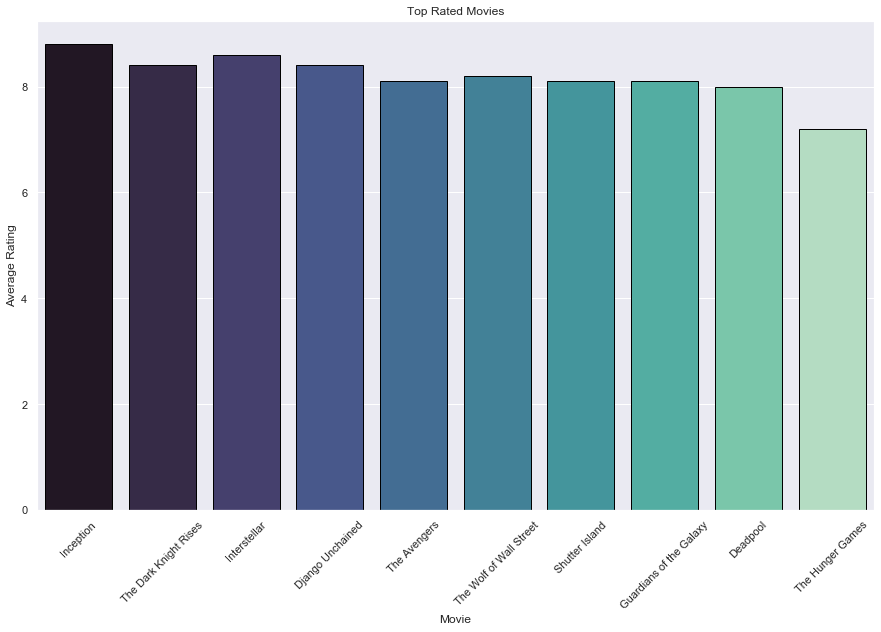

In [213]:
plt.figure(figsize = (15,9))
sns.barplot(x = 'primary_title', y = 'averagerating', data = df3.head(10), palette = 'mako', edgecolor = 'black')
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.title('Top Rated Movies')
plt.xticks(rotation = 45)

In [201]:
df3 = df2.groupby(df2['genre1']).mean()

In [203]:
df3.head(10)

,averagerating,numvotes,start_year
genre1,,,
Action,5.810361,14476.485690,2014.281912
Adult,2.000000,128.000000,2015.000000
Adventure,6.386710,10419.625193,2014.225732
Animation,6.252391,2026.006237,2014.317048
Biography,7.174512,5185.684241,2013.960967
Comedy,5.998505,2733.420780,2014.250188
Crime,6.159102,5287.373296,2014.357257
Documentary,7.316595,213.035382,2014.277897
Drama,6.370563,2198.860166,2014.268307


In [182]:
top_genre1 = df3.sort_values(['averagerating'],ascending = False)

In [186]:
top_genre1.head(10)

,averagerating,numvotes,start_year
genre1,,,
Game-Show,9.000000,7.000000,2013.000000
Music,7.506771,222.567708,2013.572917
Documentary,7.316595,213.035382,2014.277897
Biography,7.174512,5185.684241,2013.960967
Sport,6.944944,59.123596,2014.044944
Musical,6.637255,141.588235,2014.372549
History,6.413235,94.492647,2014.477941
Adventure,6.386710,10419.625193,2014.225732
Drama,6.370563,2198.860166,2014.268307


In [184]:
clean_top_genre = top_genre1.sort_values(['numvotes'], ascending = False)

In [185]:
clean_top_genre.head(10)


,averagerating,numvotes,start_year
genre1,,,
Action,5.810361,14476.485690,2014.281912
Adventure,6.386710,10419.625193,2014.225732
Mystery,6.091917,5495.549654,2014.542725
Crime,6.159102,5287.373296,2014.357257
Biography,7.174512,5185.684241,2013.960967
Comedy,5.998505,2733.420780,2014.250188
Horror,4.856971,2368.815590,2014.374610
Drama,6.370563,2198.860166,2014.268307
Animation,6.252391,2026.006237,2014.317048


In [191]:
clean_top_genre.reset_index()

,genre1,averagerating,numvotes,start_year
0,Action,5.810361,14476.485690,2014.281912
1,Adventure,6.386710,10419.625193,2014.225732
2,Mystery,6.091917,5495.549654,2014.542725
3,Crime,6.159102,5287.373296,2014.357257
4,Biography,7.174512,5185.684241,2013.960967
5,Comedy,5.998505,2733.420780,2014.250188
6,Horror,4.856971,2368.815590,2014.374610
7,Drama,6.370563,2198.860166,2014.268307
8,Animation,6.252391,2026.006237,2014.317048
9,Fantasy,5.677622,1409.433566,2014.289044


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

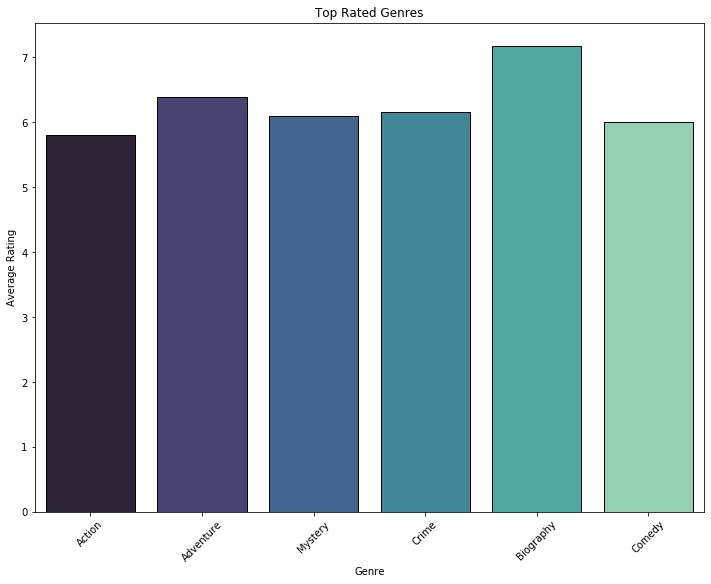

In [195]:
plt.figure(figsize = (12,9))
sns.barplot(x = 'genre1', y = 'averagerating', data = clean_top_genre.reset_index().head(6), palette = 'mako', edgecolor = 'black')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top Rated Genres')
plt.xticks(rotation = 45)